#### Student Depression Variable Imputation

**Name:** Alberto Carlos Navarrete Garcia


#### Import Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Dataset

In [17]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")


#### Exploratory Data Analysis

In [18]:
df.head()


,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


In [19]:
df.describe(include='all')


,Age,Income,Gender,Registered,City
count,103.000000,103.000000,84,103.000000,103
unique,NaN,NaN,8,NaN,4
top,NaN,NaN,Male,NaN,New York
freq,NaN,NaN,12,NaN,27
mean,29.573987,51079.867179,NaN,0.504854,NaN
std,13.137300,21167.304578,NaN,0.502421,NaN
min,-5.000000,-1000.000000,NaN,0.000000,NaN
25%,23.988273,37726.305475,NaN,0.000000,NaN
50%,28.843517,51028.444622,NaN,1.000000,NaN
75%,34.967142,58315.989946,NaN,1.000000,NaN


In [20]:
missing_values = df.isnull().sum()


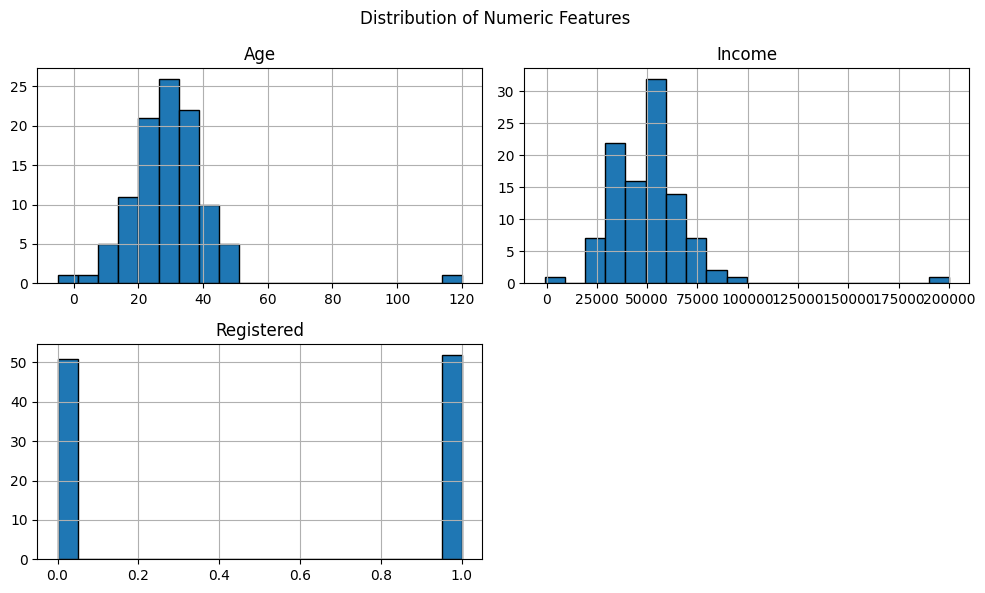

In [21]:
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.tight_layout()
plt.show()


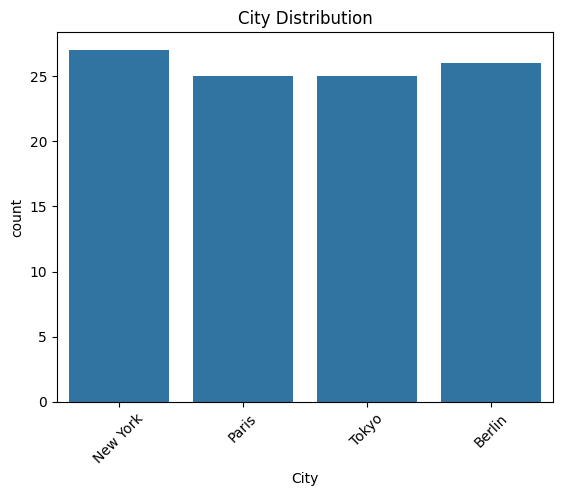

In [22]:
sns.countplot(data=df, x='City')
plt.title("City Distribution")
plt.xticks(rotation=45)
plt.show()

#### Data Cleaning

In [23]:
# Imputación: Age (1 valor nulo)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [24]:
 #Imputamos con la moda (más frecuente)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [25]:
df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['City'], drop_first=True)

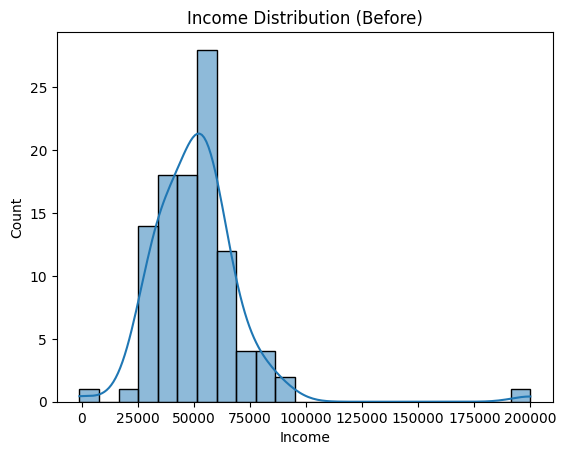

In [26]:
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution (Before)")
plt.show()

In [27]:
df['Income_log'] = np.log1p(df['Income'])


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


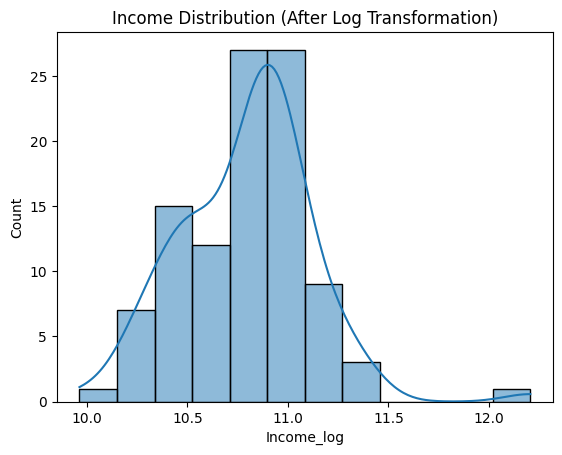

In [28]:
sns.histplot(df['Income_log'], kde=True)
plt.title("Income Distribution (After Log Transformation)")
plt.show()

In [29]:
df_cleaned = df.drop(columns=['Gender', 'Income'])


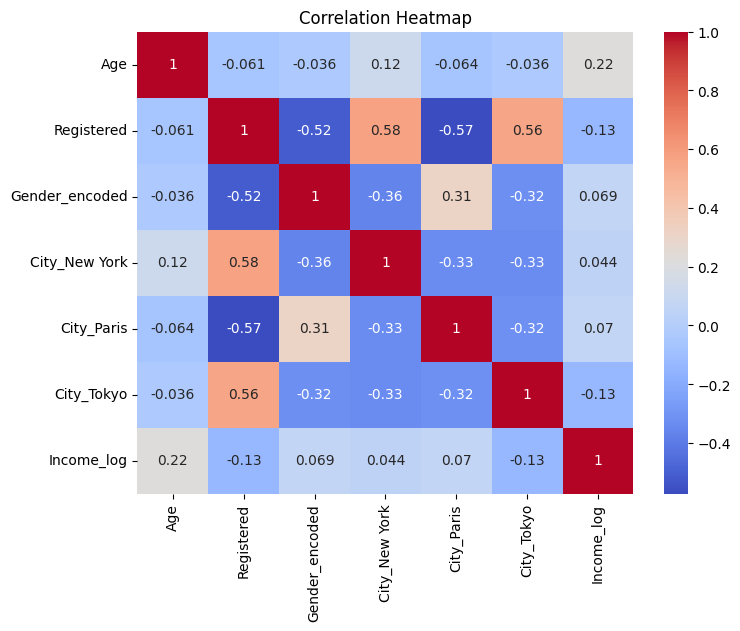

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [31]:
df_cleaned.head()


,Age,Registered,Gender_encoded,City_New York,City_Paris,City_Tokyo,Income_log
0,34.967142,1.0,0.0,True,False,False,10.267104
1,28.617357,0.0,1.0,False,True,False,10.684905
2,36.476885,1.0,NaN,False,False,True,10.711308
3,45.230299,0.0,NaN,False,False,False,10.544468
4,27.658466,1.0,NaN,True,False,False,10.770204


In [37]:
df['Gender'] = df['Gender'].str.lower().str.capitalize()


In [38]:
df = df.dropna()


In [40]:
df.columns = df.columns.str.strip().str.lower()


In [41]:
df['city']


KeyError: 'city'